**Import required libraries and modules**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Read the data**

In [3]:
train = pd.read_csv('/content/train_data.csv')

In [4]:
test = pd.read_csv('/content/test_data.csv')

**Data Preprocessing**

In [5]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [6]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Emp_ID  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [10]:
train.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [11]:
test.isnull().sum()

Emp_ID    0
dtype: int64

In [14]:
train['LastWorkingDate'].nunique()

493

**Data processing**

Convert a string to a datetime

In [8]:
train['MMM-YY'] = pd.to_datetime(train['MMM-YY'])
train['Dateofjoining'] = pd.to_datetime(train['Dateofjoining'])
train['LastWorkingDate'] = pd.to_datetime(train['LastWorkingDate'])

Return 'no null' elements chosen from train['LastWorkingDate'], 0 and 1 arrays

In [20]:
train['Target']=np.where(train['LastWorkingDate'].isnull(),0,1)
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0


**Assign new variable to group of columns on 'Emp_ID' and use tail function to return every row**

In [21]:
emp_groupby = train.groupby(['Emp_ID'])['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',
                       'Quarterly Rating','Target'].tail(1)
emp_groupby

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
2,1,28,Male,C23,Master,57387,1,1,2,1
4,2,31,Male,C7,Master,67016,2,2,1,0
9,4,43,Male,C13,Master,65603,2,2,1,1
12,5,29,Male,C9,College,46368,1,1,1,1
17,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
19078,2784,34,Male,C24,College,82815,2,3,4,0
19081,2785,34,Female,C9,College,12105,1,1,1,1
19090,2786,45,Male,C19,College,35370,2,2,1,1
19096,2787,28,Female,C20,Master,69498,1,1,1,1


**Use reset_index() function to reset the index of the 'emp_groupby' and also we will be dropping the original index labels**

In [22]:
emp_groupby.reset_index(inplace = True,drop = True)
emp_groupby

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2,1
1,2,31,Male,C7,Master,67016,2,2,1,0
2,4,43,Male,C13,Master,65603,2,2,1,1
3,5,29,Male,C9,College,46368,1,1,1,1
4,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2,3,4,0
2377,2785,34,Female,C9,College,12105,1,1,1,1
2378,2786,45,Male,C19,College,35370,2,2,1,1
2379,2787,28,Female,C20,Master,69498,1,1,1,1


**Use agg() to pass a on 'train.groupby('Emp_ID')' to be applied on a sum of 'Total Business Value'**

In [23]:
total_busi_groupby = train.groupby('Emp_ID').agg({'Total Business Value':'sum'})
total_busi_groupby

,Total Business Value
Emp_ID,
1,1715580
2,0
4,350000
5,120360
6,1265000
...,...
2784,21748820
2785,0
2786,2815090


**assign a new variable, concatenate 'total_busi_groupby' with 'emp_groupby' and setup optional set logic along the other axes, wich include axis by index(row) and inner join**

In [24]:
final = pd.concat([total_busi_groupby,emp_groupby],axis = 1,join = 'inner')
final

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
1,1715580,2,31,Male,C7,Master,67016,2,2,1,0
2,0,4,43,Male,C13,Master,65603,2,2,1,1
4,350000,6,31,Female,C11,Bachelor,78728,3,3,2,0
5,120360,8,34,Male,C2,College,70656,3,3,1,1
6,1265000,11,28,Female,C19,Master,42172,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2375,0,2782,26,Male,C19,Bachelor,29582,1,1,1,1
2377,328190,2785,34,Female,C9,College,12105,1,1,1,1
2378,0,2786,45,Male,C19,College,35370,2,2,1,1
2379,4817790,2787,28,Female,C20,Master,69498,1,1,1,1


**Make a graph of correlation matrix. The idea to highlight the most correlated variables in a data table**

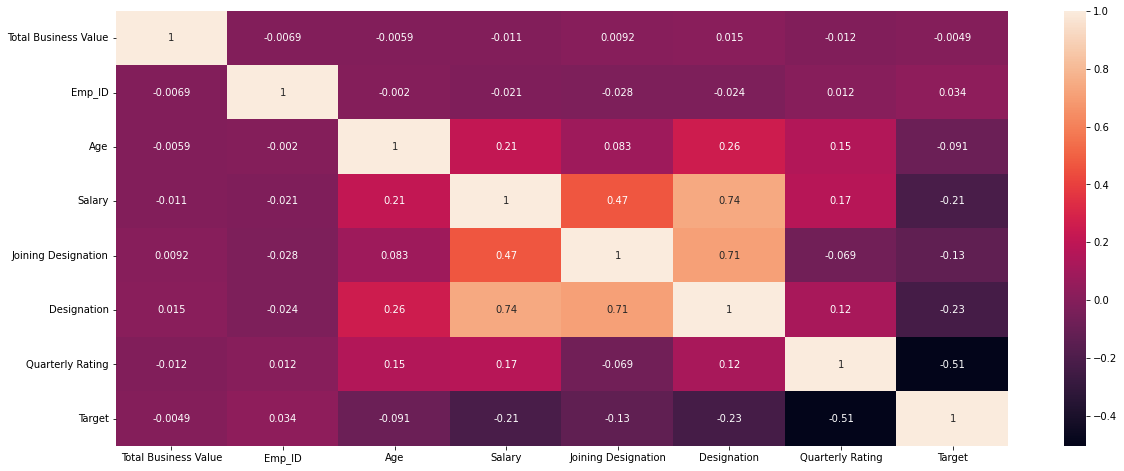

In [26]:
corr = final.corr()

plt.figure(figsize = (20,8))
sns.heatmap(corr,annot = True,cmap = 'rocket')

**'Gender' column converts categorical data into dummy or indicator variables and use parameter drop_first to get dummies out of categorical levels by removing the first level**

In [27]:
final ['Gender'] = pd.get_dummies(final['Gender'],drop_first = True)
final

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
1,1715580,2,31,1,C7,Master,67016,2,2,1,0
2,0,4,43,1,C13,Master,65603,2,2,1,1
4,350000,6,31,0,C11,Bachelor,78728,3,3,2,0
5,120360,8,34,1,C2,College,70656,3,3,1,1
6,1265000,11,28,0,C19,Master,42172,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2375,0,2782,26,1,C19,Bachelor,29582,1,1,1,1
2377,328190,2785,34,0,C9,College,12105,1,1,1,1
2378,0,2786,45,1,C19,College,35370,2,2,1,1
2379,4817790,2787,28,0,C20,Master,69498,1,1,1,1


**Import label encoder for handling categorical variables on 'City' and 'Education_Level' columns. In this technique, each label is assigned a unique integer based on alphabetical ordering** 

In [28]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

final['City'] = label.fit_transform(final['City'])

final['Education_Level'] = label.fit_transform(final['Education_Level'])

In [29]:
final.head()

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
1,1715580,2,31,1,26,2,67016,2,2,1,0
2,0,4,43,1,4,2,65603,2,2,1,1
4,350000,6,31,0,2,0,78728,3,3,2,0
5,120360,8,34,1,11,1,70656,3,3,1,1
6,1265000,11,28,0,10,2,42172,1,1,1,0


**Quantiles at this case are the set of values/points that divides the dataset into groups of equal size. Q1 we assign at 0.25, it returns the value at the first quartile of the dataset data to 0.25. Q3 assing at 0.75.**

In [31]:
Q1 = final['Total Business Value'].quantile(0.25)
Q3 = final['Total Business Value'].quantile(0.75)
IQR = Q3 - Q1

filter = (final['Total Business Value'] >= Q1 - 1.5 * IQR) & (final['Total Business Value']<= Q3 + 1.5 *IQR)
train1 = final.loc[filter]  
print("data loss percentage {}%".format(((len(final) - len(train1))/len(final))*100))

data loss percentage 14.060187469166255%


**Same as above we assign to 'Salary'**

In [32]:
Q1 = final['Salary'].quantile(0.25)
Q3 = final['Salary'].quantile(0.75)
IQR = Q3 - Q1

filter = (final['Salary'] >= Q1 - 1.5 * IQR) & (final['Salary']<= Q3 + 1.5 *IQR)
train2 = final.loc[filter]  
print("data loss percentage {}%".format(((len(final) - len(train2))/len(final))*100))

data loss percentage 2.0720276270350273%


**Next step is to assign binnary code 'Target' variable to stay(includes 1) and not_stay (0) for machine learning purpose**

In [33]:
not_stay= (train2['Target']== 0 )

stay= (train2['Target']== 1 )

In [34]:
std_x = train2.loc[:,['Total Business Value','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation','Quarterly Rating']]
std_x.shape

(1985, 9)

In [35]:
y = train2.iloc[:,-1]
y.head()

1    0
2    1
4    0
5    1
6    0
Name: Target, dtype: int64

**Implementing Undersampling for Handling Imbalanced data**

In [36]:
from imblearn.under_sampling import NearMiss
 
nm = NearMiss()
X_res,y_res=nm.fit_resample(std_x,y)

In [37]:
X_res.shape,y_res.shape

((1232, 9), (1232,))

**Data Validation**
________________________________________________________________________________

**Split data into Train and test format**

In [38]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.25,random_state =105)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('shape of Test:{}'.format(x_test.shape))

Shape of Training Xs:(924, 9)
shape of Test:(308, 9)


**Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
score = clf.score(x_test,y_test)

In [44]:
print(score)

0.7694805194805194


**Confusion Matirx**

In [45]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[121,  44],
       [ 27, 116]])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       165
           1       0.72      0.81      0.77       143

    accuracy                           0.77       308
   macro avg       0.77      0.77      0.77       308
weighted avg       0.77      0.77      0.77       308



**Prediction on Test Data**

In [49]:
test_f = pd.merge(test,final,on = 'Emp_ID')
test_f

,Emp_ID,Total Business Value,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,394,1296960,34,0,12,2,97722,2,4,3,0
1,173,0,39,1,20,1,56174,1,3,3,0
2,840,34913070,40,0,27,1,88813,1,4,2,0
3,308,150230,32,1,24,2,188418,2,5,2,0
4,1864,3009570,34,0,21,0,85688,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
616,2251,25757010,39,1,6,2,83604,2,3,3,0
617,2134,739760,40,1,21,1,116006,2,5,1,0
618,2255,0,40,1,17,1,133489,3,4,3,0
619,1644,0,48,0,28,0,105513,2,4,1,0


In [50]:
test_final = test_f.drop(['Emp_ID','Target'],axis = 1)
test_final.head()

,Total Business Value,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating
0,1296960,34,0,12,2,97722,2,4,3
1,0,39,1,20,1,56174,1,3,3
2,34913070,40,0,27,1,88813,1,4,2
3,150230,32,1,24,2,188418,2,5,2
4,3009570,34,0,21,0,85688,1,3,3


In [51]:
test_predicted = clf.predict(test_final)
test_predicted.shape

(621,)